In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
strokes_df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [3]:
strokes_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


DATA CLEANING

In [4]:
strokes_df.drop(['id'], axis = 1, inplace = True)


In [5]:
##strokes_df.dropna(axis = 0, inplace = True)


<ipython-input-6-59d1fa51b744>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = strokes_df.corr()


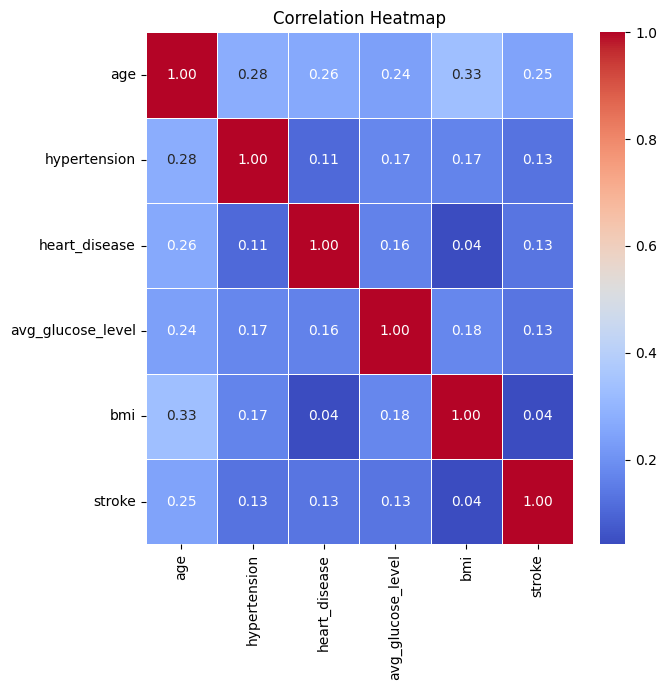

In [6]:
corr = strokes_df.corr()

plt.figure(figsize=(7, 7))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')

plt.tight_layout()

plt.show()

In [7]:
strokes_df['hypertension'].replace({0: 'have hypertension', 1: 'does not have hypertension'}, inplace=True)
strokes_df['heart_disease'].replace({0: 'have heart disease', 1: 'does not have heart disease'}, inplace=True)
strokes_df['stroke'].replace({0: 'The patient had not a stroke', 1: 'The patient had a stroke'}, inplace=True)

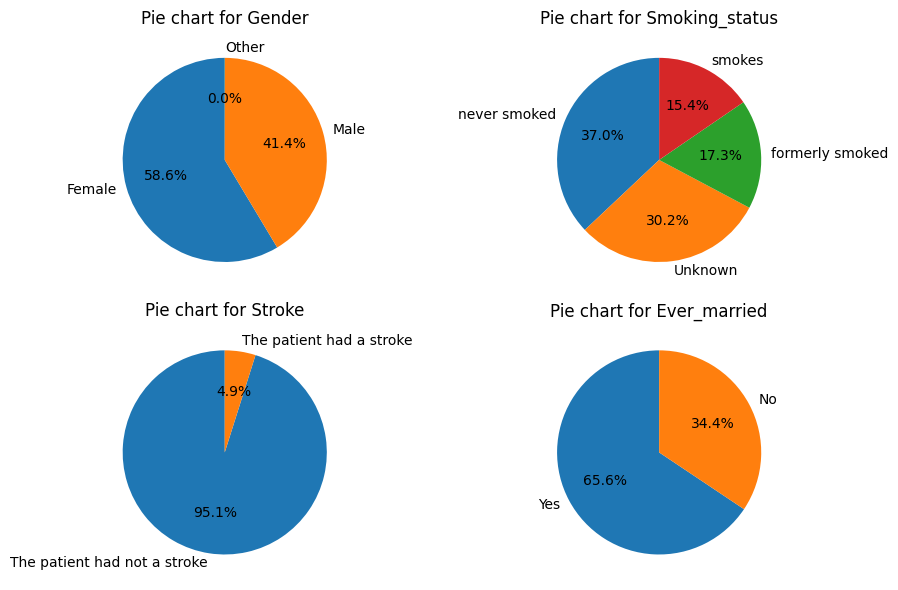

In [9]:


categorical_vars =  ['gender','smoking_status','stroke', 'ever_married']

num_vars = len(categorical_vars)

num_cols = 2

num_rows = (num_vars + 1) // 2  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 6))

axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    var_counts = strokes_df[var].value_counts()

    axes[i].pie(var_counts, labels=var_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Pie chart for {var.capitalize()}')

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

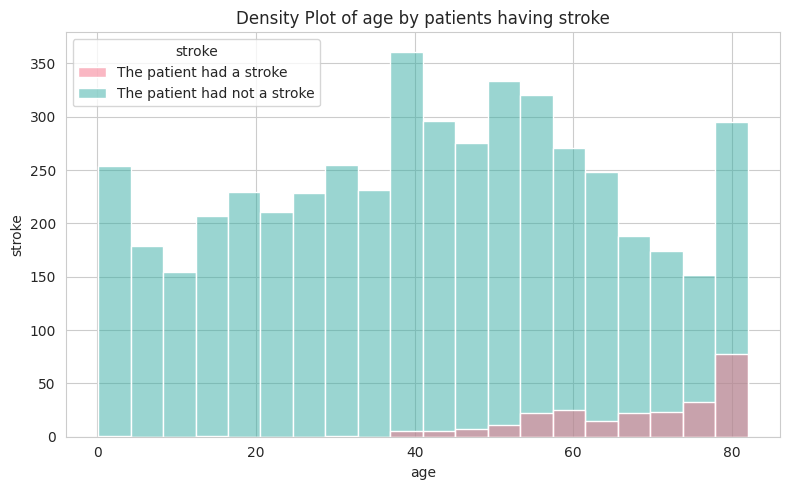

In [10]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(data=strokes_df, x='age', hue='stroke', fill=True, palette='husl')

plt.title('Density Plot of age by patients having stroke')
plt.xlabel('age')
plt.ylabel('stroke')

plt.tight_layout()
plt.show()

In [11]:
data_plot=strokes_df[strokes_df['stroke']=='The patient had a stroke']['gender'].value_counts()

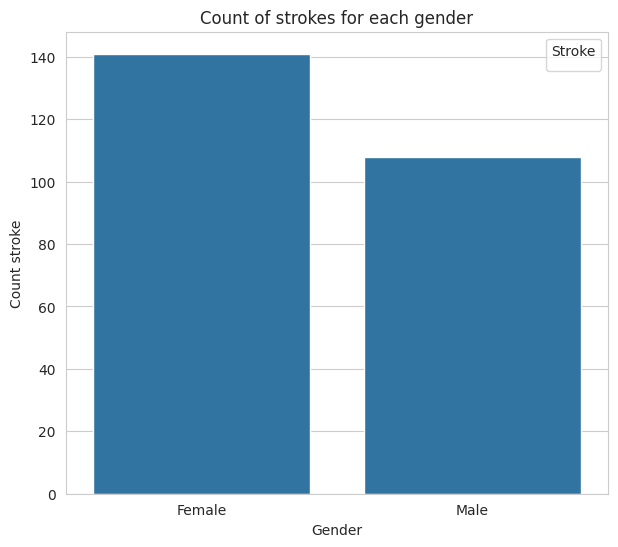

In [14]:
plt.figure(figsize=(7, 6))
sns.barplot(x=data_plot.index, y=data_plot.values)

plt.title('Count of strokes for each gender')
plt.xlabel('Gender')
plt.ylabel('Count stroke')


plt.legend(title='Stroke')
plt.show()



In [15]:
data_plot_smokers=strokes_df[strokes_df['stroke']=='The patient had a stroke']['smoking_status'].value_counts()

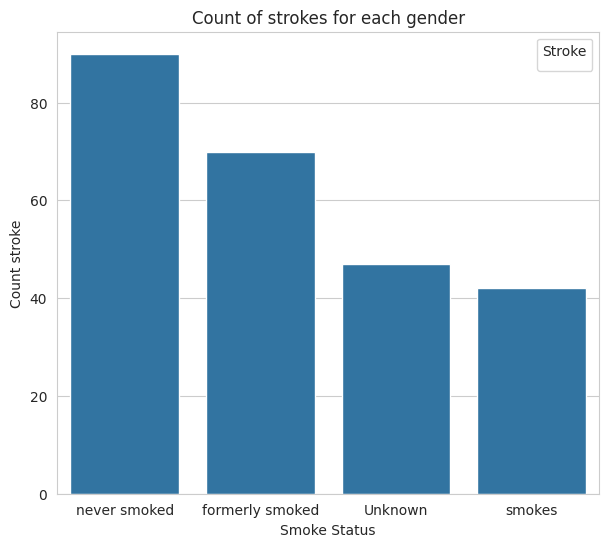

In [17]:
plt.figure(figsize=(7, 6))
sns.barplot(x=data_plot_smokers.index, y=data_plot_smokers.values)

plt.title('Count of strokes for each gender')
plt.xlabel('Smoke Status')
plt.ylabel('Count stroke')


plt.legend(title='Stroke')
plt.show()
